# TensorFlow Keras Regression Model
### House Price Prediction using House Sales data in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('kc_house_data.csv')

### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

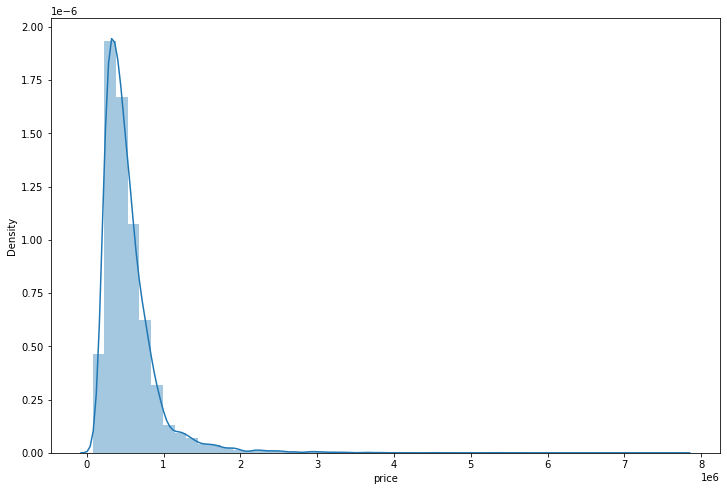

In [6]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

### Checking the significance of Geographical Properties

<AxesSubplot:xlabel='long', ylabel='lat'>

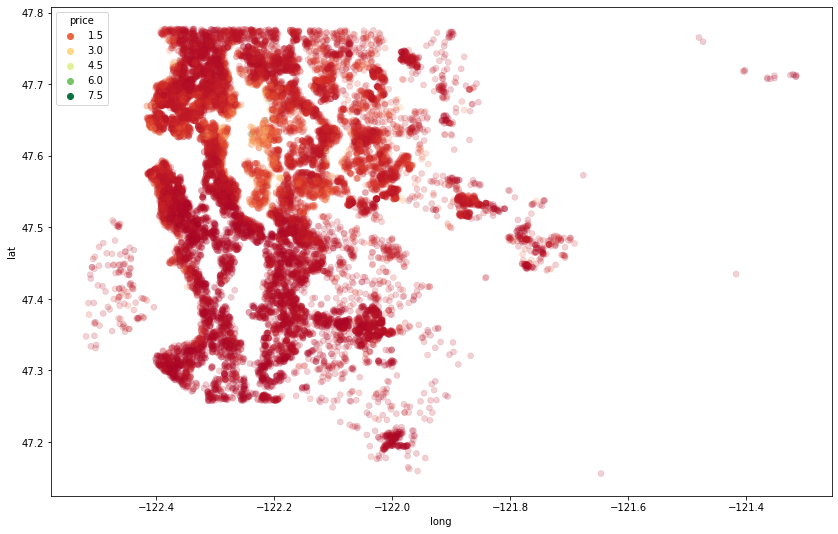

In [7]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='long',y='lat',data=df,hue='price',
               edgecolor=None,alpha=0.2, palette='RdYlGn')


<AxesSubplot:xlabel='waterfront', ylabel='price'>

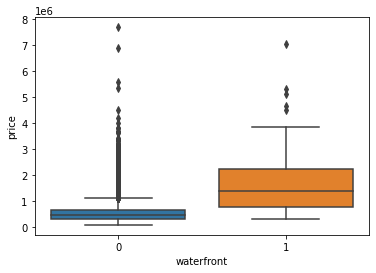

In [8]:
sns.boxplot(x='waterfront',y='price',data=df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [10]:
df = df.drop('id',axis=1)

### Feature Engineering from Date

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['month'] = df['date'].apply(lambda date:date.month)

In [13]:
df['year'] = df['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

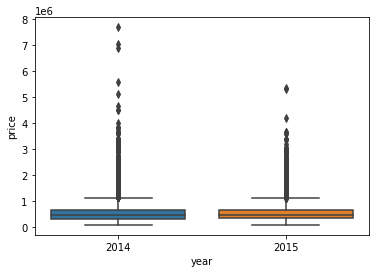

In [14]:
sns.boxplot(x='year',y='price',data=df)

In [15]:
df = df.drop('date',axis=1)

In [16]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [17]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [18]:
df = df.drop('zipcode',axis=1)

In [19]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [20]:
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

### Scaling and Train test data

In [21]:
X = df.drop('price',axis=1)
y = df['price']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

#### Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train= scaler.fit_transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

### Creating a Neural Network Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [40]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [42]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=600, verbose=1, callbacks=[early_stop])

Epoch 1/600
119/119 [==============================] - 1s 3ms/step - loss: 423627194368.0000 - val_loss: 433020338176.0000
Epoch 2/600
119/119 [==============================] - 0s 1ms/step - loss: 422775357440.0000 - val_loss: 430010204160.0000
Epoch 3/600
119/119 [==============================] - 0s 2ms/step - loss: 410744848384.0000 - val_loss: 401668571136.0000
Epoch 4/600
119/119 [==============================] - 0s 2ms/step - loss: 349370908672.0000 - val_loss: 297286238208.0000
Epoch 5/600
119/119 [==============================] - 0s 2ms/step - loss: 213289779200.0000 - val_loss: 149120221184.0000
Epoch 6/600
119/119 [==============================] - 0s 2ms/step - loss: 112941817856.0000 - val_loss: 105687343104.0000
Epoch 7/600
119/119 [==============================] - 0s 2ms/step - loss: 99015335936.0000 - val_loss: 103450075136.0000
Epoch 8/600
119/119 [==============================] - 0s 2ms/step - loss: 97487429632.0000 - val_loss: 101862891520.0000
Epoch 9/600
119/11

119/119 [==============================] - 0s 2ms/step - loss: 38506164224.0000 - val_loss: 38082301952.0000
Epoch 69/600
119/119 [==============================] - 0s 1ms/step - loss: 38309314560.0000 - val_loss: 37836763136.0000
Epoch 70/600
119/119 [==============================] - 0s 2ms/step - loss: 38109487104.0000 - val_loss: 37692829696.0000
Epoch 71/600
119/119 [==============================] - 0s 2ms/step - loss: 37938970624.0000 - val_loss: 37454123008.0000
Epoch 72/600
119/119 [==============================] - 0s 2ms/step - loss: 37779255296.0000 - val_loss: 37329526784.0000
Epoch 73/600
119/119 [==============================] - 0s 2ms/step - loss: 37624086528.0000 - val_loss: 37122019328.0000
Epoch 74/600
119/119 [==============================] - 0s 1ms/step - loss: 37451866112.0000 - val_loss: 36990877696.0000
Epoch 75/600
119/119 [==============================] - 0s 1ms/step - loss: 37295403008.0000 - val_loss: 36780408832.0000
Epoch 76/600
119/119 [===============

Epoch 135/600
119/119 [==============================] - 0s 2ms/step - loss: 33285599232.0000 - val_loss: 32578191360.0000
Epoch 136/600
119/119 [==============================] - 0s 2ms/step - loss: 33276997632.0000 - val_loss: 32570142720.0000
Epoch 137/600
119/119 [==============================] - 0s 2ms/step - loss: 33179254784.0000 - val_loss: 32563165184.0000
Epoch 138/600
119/119 [==============================] - 0s 2ms/step - loss: 33184737280.0000 - val_loss: 32493383680.0000
Epoch 139/600
119/119 [==============================] - 0s 2ms/step - loss: 33166698496.0000 - val_loss: 32504313856.0000
Epoch 140/600
119/119 [==============================] - 0s 2ms/step - loss: 33111724032.0000 - val_loss: 32402890752.0000
Epoch 141/600
119/119 [==============================] - 0s 2ms/step - loss: 33077706752.0000 - val_loss: 32373030912.0000
Epoch 142/600
119/119 [==============================] - 0s 2ms/step - loss: 33036654592.0000 - val_loss: 32355379200.0000
Epoch 143/600
11

119/119 [==============================] - 0s 2ms/step - loss: 31660730368.0000 - val_loss: 30964160512.0000
Epoch 202/600
119/119 [==============================] - 0s 2ms/step - loss: 31647100928.0000 - val_loss: 30935685120.0000
Epoch 203/600
119/119 [==============================] - 0s 2ms/step - loss: 31558455296.0000 - val_loss: 30971557888.0000
Epoch 204/600
119/119 [==============================] - 0s 2ms/step - loss: 31539671040.0000 - val_loss: 30913093632.0000
Epoch 205/600
119/119 [==============================] - 0s 2ms/step - loss: 31525703680.0000 - val_loss: 30906236928.0000
Epoch 206/600
119/119 [==============================] - 0s 2ms/step - loss: 31493296128.0000 - val_loss: 31015204864.0000
Epoch 207/600
119/119 [==============================] - 0s 2ms/step - loss: 31552417792.0000 - val_loss: 30874951680.0000
Epoch 208/600
119/119 [==============================] - 0s 2ms/step - loss: 31463878656.0000 - val_loss: 30870040576.0000
Epoch 209/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 30449158144.0000 - val_loss: 30051508224.0000
Epoch 268/600
119/119 [==============================] - 0s 2ms/step - loss: 30498383872.0000 - val_loss: 29963900928.0000
Epoch 269/600
119/119 [==============================] - 0s 2ms/step - loss: 30438166528.0000 - val_loss: 29951492096.0000
Epoch 270/600
119/119 [==============================] - 0s 2ms/step - loss: 30376366080.0000 - val_loss: 29978451968.0000
Epoch 271/600
119/119 [==============================] - 0s 2ms/step - loss: 30378616832.0000 - val_loss: 29923786752.0000
Epoch 272/600
119/119 [==============================] - 0s 2ms/step - loss: 30388447232.0000 - val_loss: 29913337856.0000
Epoch 273/600
119/119 [==============================] - 0s 2ms/step - loss: 30435741696.0000 - val_loss: 29896648704.0000
Epoch 274/600
119/119 [==============================] - 0s 2ms/step - loss: 30343862272.0000 - val_loss: 29894959104.0000
Epoch 275/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 29348040704.0000 - val_loss: 29053282304.0000
Epoch 334/600
119/119 [==============================] - 0s 2ms/step - loss: 29306701824.0000 - val_loss: 29025308672.0000
Epoch 335/600
119/119 [==============================] - 0s 2ms/step - loss: 29264936960.0000 - val_loss: 28959207424.0000
Epoch 336/600
119/119 [==============================] - 0s 2ms/step - loss: 29230733312.0000 - val_loss: 28986681344.0000
Epoch 337/600
119/119 [==============================] - 0s 2ms/step - loss: 29225742336.0000 - val_loss: 28913176576.0000
Epoch 338/600
119/119 [==============================] - 0s 2ms/step - loss: 29222330368.0000 - val_loss: 28962281472.0000
Epoch 339/600
119/119 [==============================] - 0s 2ms/step - loss: 29177919488.0000 - val_loss: 28914202624.0000
Epoch 340/600
119/119 [==============================] - 0s 2ms/step - loss: 29167331328.0000 - val_loss: 28873431040.0000
Epoch 341/600
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 27836293120.0000 - val_loss: 27938603008.0000
Epoch 400/600
119/119 [==============================] - 0s 1ms/step - loss: 27816892416.0000 - val_loss: 27714490368.0000
Epoch 401/600
119/119 [==============================] - 0s 2ms/step - loss: 27771103232.0000 - val_loss: 27782490112.0000
Epoch 402/600
119/119 [==============================] - 0s 2ms/step - loss: 27760699392.0000 - val_loss: 27694489600.0000
Epoch 403/600
119/119 [==============================] - 0s 2ms/step - loss: 27724660736.0000 - val_loss: 27658121216.0000
Epoch 404/600
119/119 [==============================] - 0s 1ms/step - loss: 27681632256.0000 - val_loss: 27658735616.0000
Epoch 405/600
119/119 [==============================] - 0s 2ms/step - loss: 27699017728.0000 - val_loss: 27623852032.0000
Epoch 406/600
119/119 [==============================] - 0s 2ms/step - loss: 27688830976.0000 - val_loss: 27636695040.0000
Epoch 407/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 26687803392.0000 - val_loss: 26897559552.0000
Epoch 466/600
119/119 [==============================] - 0s 2ms/step - loss: 26619576320.0000 - val_loss: 26869729280.0000
Epoch 467/600
119/119 [==============================] - 0s 2ms/step - loss: 26670915584.0000 - val_loss: 26814707712.0000
Epoch 468/600
119/119 [==============================] - 0s 2ms/step - loss: 26679605248.0000 - val_loss: 26847250432.0000
Epoch 469/600
119/119 [==============================] - 0s 2ms/step - loss: 26598602752.0000 - val_loss: 26804533248.0000
Epoch 470/600
119/119 [==============================] - 0s 2ms/step - loss: 26634768384.0000 - val_loss: 26857082880.0000
Epoch 471/600
119/119 [==============================] - 0s 2ms/step - loss: 26586302464.0000 - val_loss: 26763935744.0000
Epoch 472/600
119/119 [==============================] - 0s 1ms/step - loss: 26551857152.0000 - val_loss: 26759268352.0000
Epoch 473/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 25778556928.0000 - val_loss: 26178428928.0000
Epoch 532/600
119/119 [==============================] - 0s 2ms/step - loss: 25749602304.0000 - val_loss: 26229088256.0000
Epoch 533/600
119/119 [==============================] - 0s 2ms/step - loss: 25763837952.0000 - val_loss: 26165569536.0000
Epoch 534/600
119/119 [==============================] - 0s 2ms/step - loss: 25731164160.0000 - val_loss: 26179274752.0000
Epoch 535/600
119/119 [==============================] - 0s 2ms/step - loss: 25734457344.0000 - val_loss: 26142922752.0000
Epoch 536/600
119/119 [==============================] - 0s 2ms/step - loss: 25692684288.0000 - val_loss: 26143127552.0000
Epoch 537/600
119/119 [==============================] - 0s 2ms/step - loss: 25719330816.0000 - val_loss: 26131351552.0000
Epoch 538/600
119/119 [==============================] - 0s 2ms/step - loss: 25705807872.0000 - val_loss: 26137143296.0000
Epoch 539/600
119/119 [=======

119/119 [==============================] - 0s 2ms/step - loss: 24800598016.0000 - val_loss: 25630437376.0000
Epoch 598/600
119/119 [==============================] - 0s 2ms/step - loss: 24803702784.0000 - val_loss: 25622239232.0000
Epoch 599/600
119/119 [==============================] - 0s 2ms/step - loss: 24764987392.0000 - val_loss: 25589006336.0000
Epoch 600/600
119/119 [==============================] - 0s 2ms/step - loss: 24768862208.0000 - val_loss: 25630892032.0000


<AxesSubplot:>

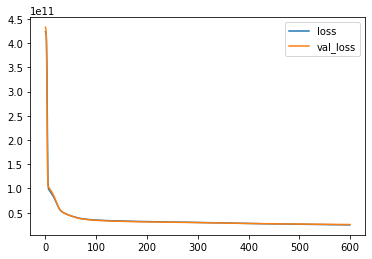

In [44]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [46]:
X_test

array([[0.18181818, 0.125     , 0.05735849, ..., 0.010289  , 0.        ,
        1.        ],
       [0.36363636, 0.28125   , 0.13207547, ..., 0.00909894, 0.27272727,
        1.        ],
       [0.36363636, 0.3125    , 0.16679245, ..., 0.00418246, 0.09090909,
        1.        ],
       ...,
       [0.27272727, 0.25      , 0.17584906, ..., 0.00821673, 0.90909091,
        0.        ],
       [0.18181818, 0.125     , 0.04603774, ..., 0.0044122 , 0.27272727,
        1.        ],
       [0.36363636, 0.4375    , 0.24226415, ..., 0.01018447, 0.72727273,
        0.        ]])

In [47]:
predictions = model.predict(X_test)

203/203 [==============================] - 0s 689us/step


In [48]:
mean_absolute_error(y_test,predictions)

97565.66332992751

In [49]:
np.sqrt(mean_squared_error(y_test,predictions))

160096.51413020553

In [50]:
explained_variance_score(y_test,predictions)

0.8174245733089006

### Prediction on new Data

In [51]:
single_house = df.drop('price',axis=1).iloc[0]

In [52]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

C:\Users\balaj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [53]:
new_data = model.predict(single_house)

1/1 [==============================] - 0s 15ms/step


In [56]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

In [57]:
new_data #Predicted House Price

array([[287998.44]], dtype=float32)